In [7]:
import numpy as np
import pandas as pd
import nest_asyncio
nest_asyncio.apply()
import stan
import matplotlib.pyplot as plt
import arviz as az

## tutorial

In [2]:
schools_code = """
data {
  int<lower=0> J;         // number of schools
  real y[J];              // estimated treatment effects
  real<lower=0> sigma[J]; // standard error of effect estimates
}
parameters {
  real mu;                // population treatment effect
  real<lower=0> tau;      // standard deviation in treatment effects
  vector[J] eta;          // unscaled deviation from mu by school
}
transformed parameters {
  vector[J] theta = mu + tau * eta;        // school treatment effects
}
model {
  target += normal_lpdf(eta | 0, 1);       // prior log-density
  target += normal_lpdf(y | theta, sigma); // log-likelihood
}
"""

schools_data = {"J": 8,
                "y": [28,  8, -3,  7, -1,  1, 18, 12],
                "sigma": [15, 10, 16, 11,  9, 11, 10, 18]}

posterior = stan.build(schools_code, data=schools_data)
fit = posterior.sample(num_chains=4, num_samples=1000)
# eta = fit["eta"]  # array with shape (8, 4000)
# df = fit.to_frame()  # pandas `DataFrame, requires pandas

Building: found in cache, done.
Messages from stanc:
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 6.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.4 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.23 seconds.
  Adjust your expectations accordingly!


## 베르누이 간단한 튜토리얼

In [3]:
bn_code = """

data {
    int N;
    int <lower = 0, upper = 1> y[N];
}

parameters {
     real <lower = 0, upper = 1> p;
}

model {
    for (n in 1:N)
     y[n] ~ bernoulli(p);
     
    p ~ beta(1,1);
}

"""

In [4]:
temp_data = {
    'N' : 10,
    'y' : [1, 1, 0, 0, 1, 0, 1, 1, 1, 1] 
}
    

In [23]:
posterior = stan.build(bn_code, data=temp_data, random_seed = 123)
fit = posterior.sample(num_chains = 4, num_samples=2000, num_warmup=1000)
df = fit.to_frame()
df

Building: found in cache, done.
Sampling:   0%
Sampling:  25% (3000/12000)
Sampling:  50% (6000/12000)
Sampling:  75% (9000/12000)
Sampling: 100% (12000/12000)
Sampling: 100% (12000/12000), done.
Messages received during sampling:
  Gradient evaluation took 4.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.41 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!


parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p
draws,,,,,,,,
0,-7.785915,1.000000,0.837619,2.0,7.0,0.0,8.595957,0.737497
1,-7.938903,0.947149,1.267729,1.0,1.0,0.0,7.946203,0.765484
2,-7.773780,0.533022,1.283767,1.0,3.0,0.0,9.134156,0.734666
3,-7.638794,0.994361,0.981196,2.0,3.0,0.0,7.682067,0.661849
4,-8.563015,0.922366,0.837619,2.0,7.0,0.0,8.668317,0.828881
...,...,...,...,...,...,...,...,...
7995,-8.149111,0.902718,0.981196,2.0,3.0,0.0,8.309398,0.792294
7996,-7.963854,0.869000,0.837619,1.0,3.0,0.0,9.016855,0.769172
7997,-8.492514,0.774814,1.267729,1.0,3.0,0.0,8.833733,0.823596


In [17]:
df['p'].describe()

count    8000.000000
mean        0.667559
std         0.133379
min         0.183397
25%         0.575840
50%         0.678283
75%         0.768627
max         0.970558
Name: p, dtype: float64

array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

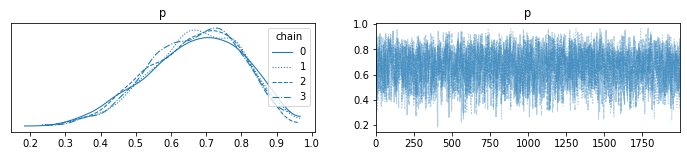

In [35]:
az.plot_trace(fit, legend=True, kind='trace')


array([<AxesSubplot:title={'center':'p'}>], dtype=object)

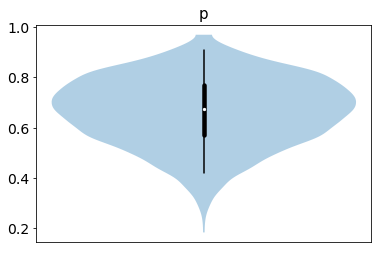

In [9]:
az.plot_violin(fit)

array([[<AxesSubplot:title={'center':'p'}>]], dtype=object)

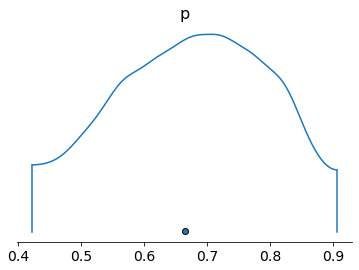

In [11]:
az.plot_density(fit)

<AxesSubplot:title={'center':'p'}, xlabel='Quantile', ylabel='ESS for small intervals'>

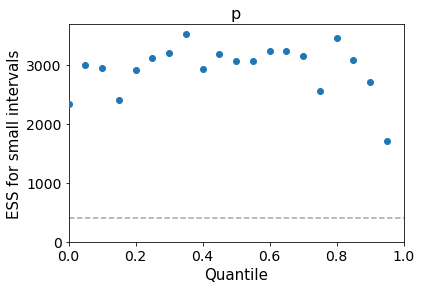

In [14]:
az.plot_ess(fit)